# Census Income Classification
## Report
### Juan Manuel

Prediction task is to determine whether a person makes over 50K a year.

## Importing Libraries

In [80]:
# We import all the libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import \
classification_report,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout

## Loading Dataset

In [81]:
# First we read the file
data = pd.read_csv('adult.data',header=None,skiprows=1,sep=',')

In [82]:
# We rename the columns according to the info of the dataset
data_columns=['age','work_class','fnlwgt','education','education_number'\
              ,'marital_status','occupation','relationship'\
              ,'race','sex','capital_gain','capital_loss'\
              ,'hours_per_week','native_country','class']
data.columns=data_columns

We have the columns and data type:
- Age
- Work Class (Nominal)
- Fnlwgt
- Education (Ordinal)
- Education Number (Ordinal)
- Marital Status (Nominal)
- Occupation (Nominal)
- Relationship (Nominal)
- Race (Nominal)
- Sex (Nominal)
- Capital Gain
- Capital Loss
- Hours per Week (Interval)
- Native Country (Naminal)
- Class

## Data Analysis

In [83]:
#First we check the duplicated values
duplicates=data.duplicated().sum()
print('The number of duplicates is :'\
      ,duplicates,'\n Total number of data points is:',data.shape)
data=data.drop_duplicates()
print('After deleting duplicates it is:',data.shape)

The number of duplicates is : 24 
 Total number of data points is: (32560, 15)
After deleting duplicates it is: (32536, 15)


### General Basic Statistics

In [5]:
# We have a general view of the key measures of numerical variables
data.describe()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# We have a general view of the key measures of categorical variables
data.describe(exclude=np.number)

,work_class,education,marital_status,occupation,relationship,race,sex,native_country,class
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27794,21774,29152,24697


### Single Variables

#### Numeric

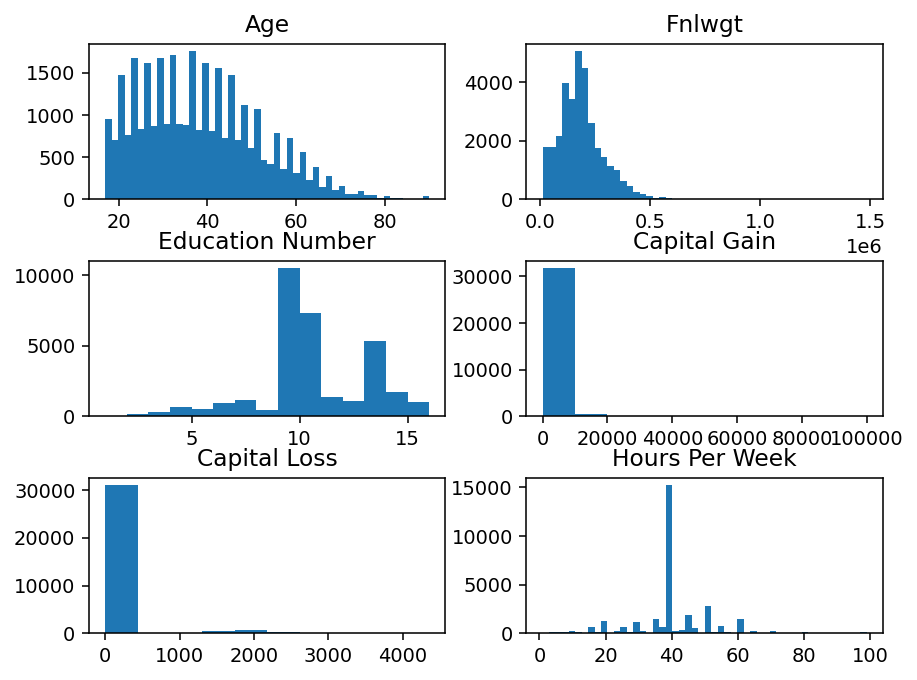

In [7]:
#We check all the numeric variables and their distributions
fig,ax=plt.subplots(3,2)
fig.dpi=(140)
fig.tight_layout()
ax=ax.flatten()
ax[0].hist(data.age,bins=50)
ax[0].set_title('Age')
ax[1].hist(data.fnlwgt,bins=50)
ax[1].set_title('Fnlwgt')
ax[2].hist(data.education_number,bins=15)
ax[2].set_title('Education Number')
ax[3].hist(data.capital_gain,bins=10)
ax[3].set_title('Capital Gain')
ax[4].hist(data.capital_loss,bins=10)
ax[4].set_title('Capital Loss')
ax[5].hist(data.hours_per_week,bins=50)
ax[5].set_title('Hours Per Week')
plt.show()

#### Categorical

Text(0.5, 0, 'Proportion')

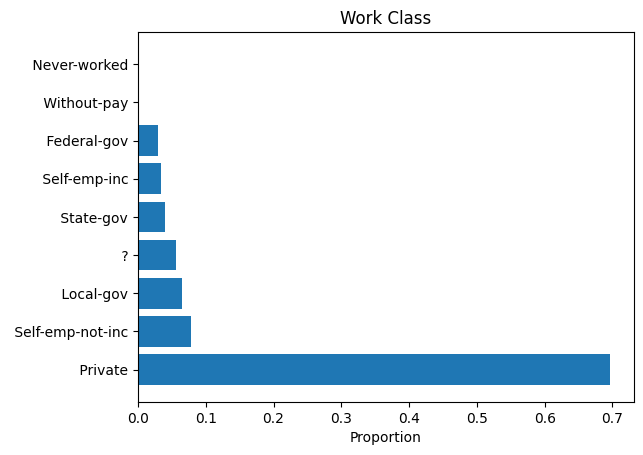

In [8]:
# Check work_class variable relative freq
sum_work=data.work_class.value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data.work_class.value_counts().index,\
        data.work_class.value_counts().values/sum_work)
ax.set_title('Work Class')
ax.set_xlabel('Proportion')

Text(0.5, 0, 'Proportion')

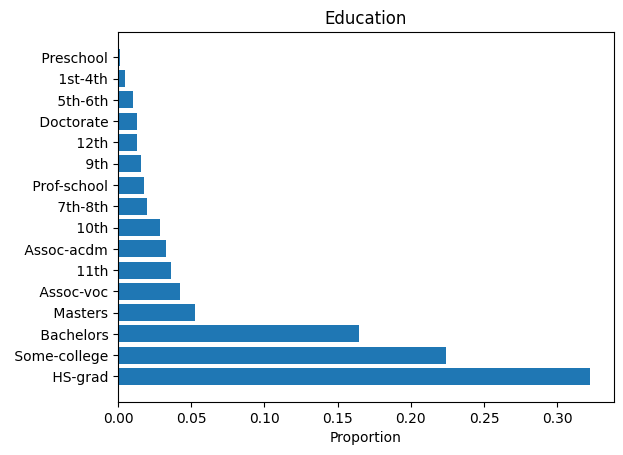

In [9]:
#We check education class variable with relative freq
sum_education=data.education.value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data.education.value_counts().index,\
        data.education.value_counts().values/sum_work)
ax.set_title('Education')
ax.set_xlabel('Proportion')

Text(0.5, 0, 'Proportion')

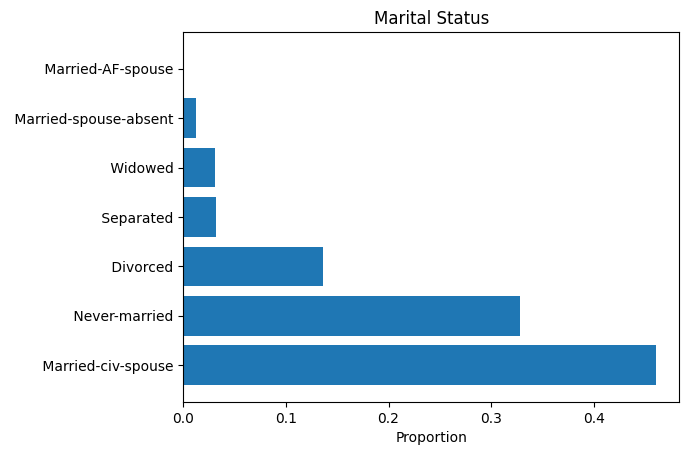

In [10]:
#We check marital status class variable with relative freq
sum_marital=data.marital_status.value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data.marital_status.value_counts().index,\
        data.marital_status.value_counts().values/sum_marital)
ax.set_title('Marital Status')
ax.set_xlabel('Proportion')

Text(0.5, 0, 'Proportion')

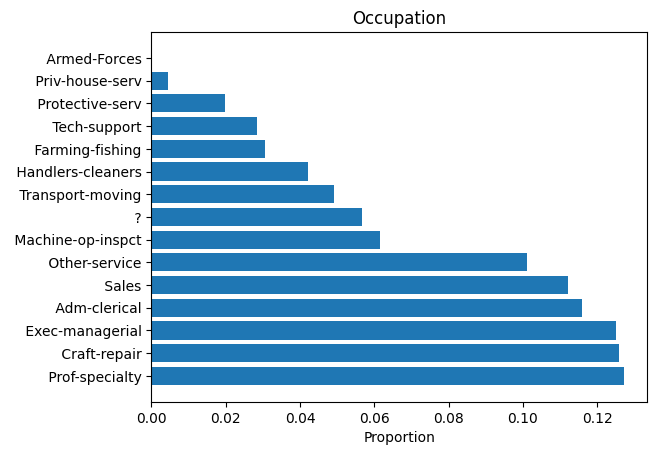

In [11]:
#We check occupation class variable with relative freq
sum_occupation=data.occupation.value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data.occupation.value_counts().index,\
        data.occupation.value_counts().values/sum_occupation)
ax.set_title('Occupation')
ax.set_xlabel('Proportion')

Text(0.5, 0, 'Proportion')

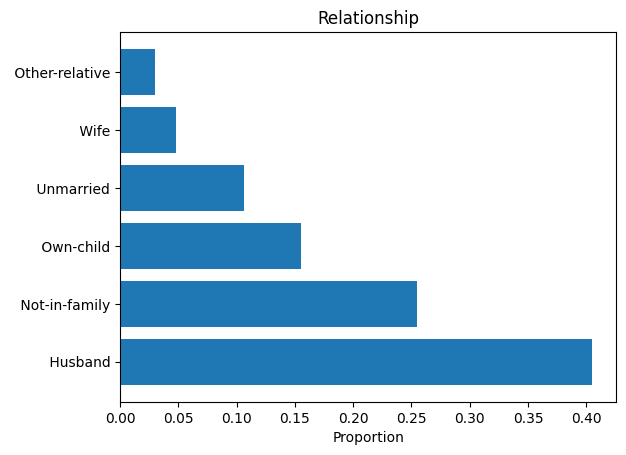

In [12]:
#We check relationship class variable with relative freq
sum_relationship=data.relationship.value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data.relationship.value_counts().index,\
        data.relationship.value_counts().values/sum_marital)
ax.set_title('Relationship')
ax.set_xlabel('Proportion')

Text(0.5, 0, 'Proportion')

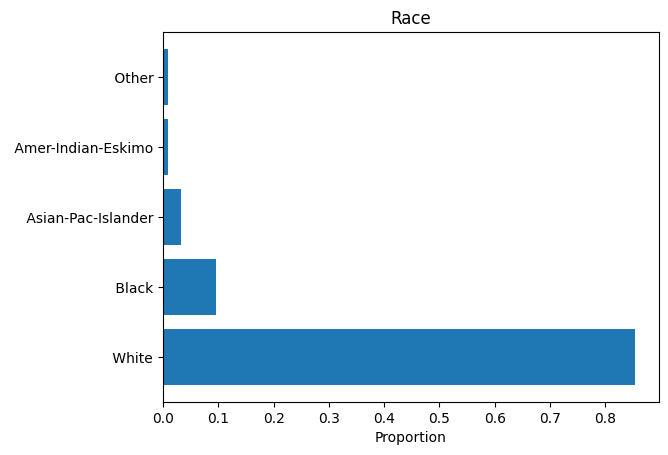

In [13]:
#We check race class variable with relative freq
sum_race=data.race.value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data.race.value_counts().index,\
        data.race.value_counts().values/sum_race)
ax.set_title('Race')
ax.set_xlabel('Proportion')

Text(0.5, 0, 'Proportion')

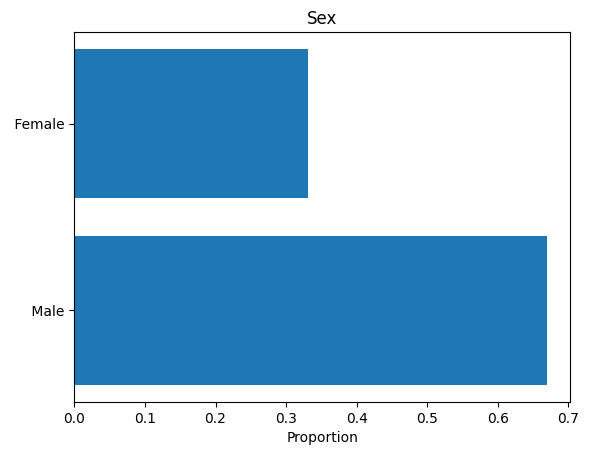

In [14]:
#We check sex class variable with relative freq
sum_sex=data.sex.value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data.sex.value_counts().index,\
        data.sex.value_counts().values/sum_sex)
ax.set_title('Sex')
ax.set_xlabel('Proportion')

Text(0.5, 0, 'Proportion')

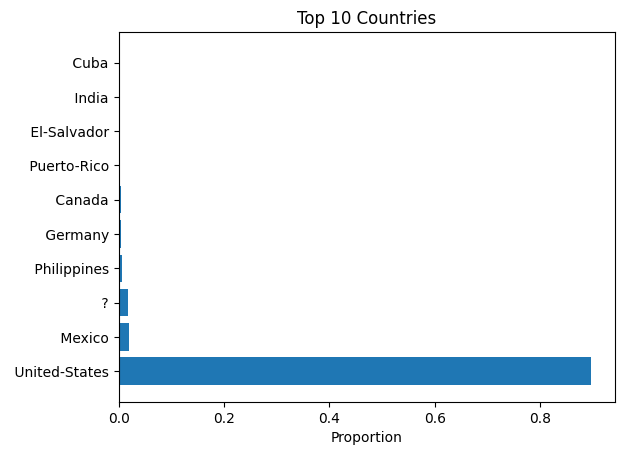

In [15]:
#We check t10 countries class variable with relative freq
sum_country=data.native_country.value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data.native_country.value_counts()[:10].index,\
        data.native_country.value_counts()[:10].values/sum_country)
ax.set_title('Top 10 Countries')
ax.set_xlabel('Proportion')

Text(0.5, 0, 'Proportion')

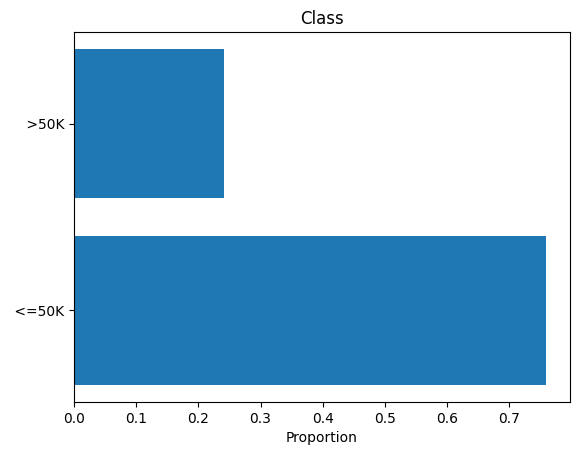

In [16]:
#We check class variable with relative freq
sum_class=data['class'].value_counts().values.sum()
fig,ax=plt.subplots()
ax.barh(data['class'].value_counts().index.astype(str),\
        data['class'].value_counts().values/sum_class)
ax.set_title('Class')
ax.set_xlabel('Proportion')

### We 

In [17]:
#We set variables for the 
data_columns_quantitative=['fnlwgt','capital_gain'\
                          ,'capital_loss','hours_per_week']

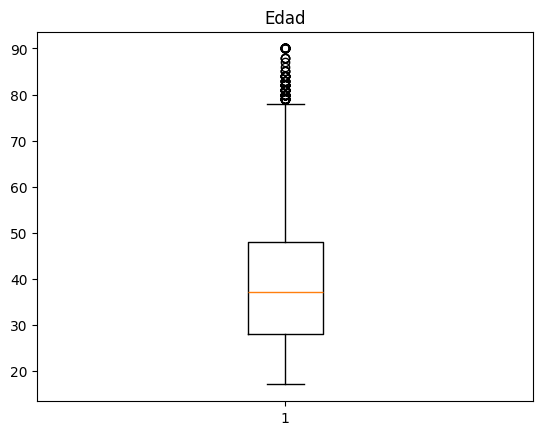

In [18]:
#We make the boxplot of the age var
plt.boxplot(data['age'])
plt.title('Edad')
plt.show()

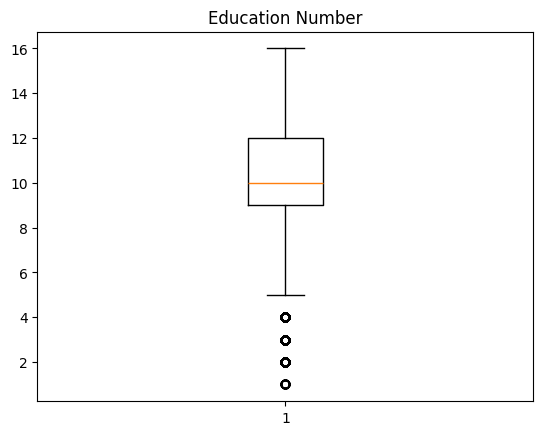

In [19]:
#We make the boxplot of the education_number var
plt.boxplot(data['education_number'])
plt.title('Education Number')
plt.show()

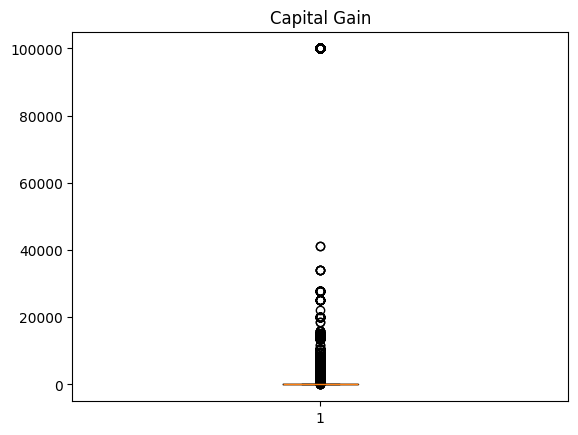

In [20]:
#We make the boxplot of the capital gain var
plt.boxplot(data['capital_gain'])
plt.title('Capital Gain')
plt.show()

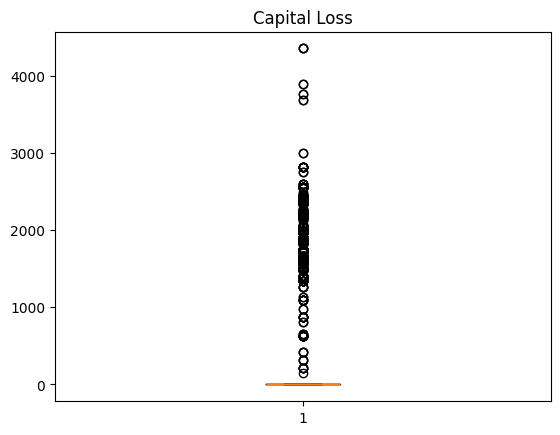

In [21]:
#We make the boxplot of the capital loss var
plt.boxplot(data['capital_loss'])
plt.title('Capital Loss')
plt.show()

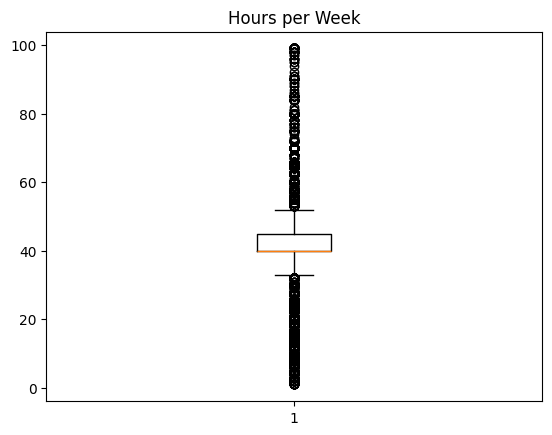

In [22]:
#We make the boxplot of the hours var
plt.boxplot(data['hours_per_week'])
plt.title('Hours per Week')
plt.show()

## Preprocessing

In [23]:
#We try to create a new variable with gain-loss
data_columns_quantitative.append('capital_net')
data['capital_net']=data['capital_gain']-data['capital_loss']

### Outliers

In [24]:
#We set the quantity variables as float
data[data_columns_quantitative]=data[data_columns_quantitative].astype(float)

In [25]:
#We normalize all the variables to analyze
data.loc[:,data_columns_quantitative]=data.loc[:,data_columns_quantitative].astype('float')
data2=data.copy()
data.loc[:,data_columns_quantitative]=(data2.loc[:,data_columns_quantitative]\
                                       -data2.loc[:,data_columns_quantitative].mean())/data2.loc[:,data_columns_quantitative].std()

Outliers represented about 6% of the total dataset, in this case was removed

In [26]:
#Removing outliers
print('Number of rows before removing the outliers is:',data.shape[0])
data = data.loc[((data.loc[:,['capital_gain','capital_loss','hours_per_week']] > -3)\
                                      .sum(axis=1)==3) & ((data.loc[:,['capital_gain','capital_loss','hours_per_week']] <= 3).sum(axis=1)==3),:]
print('Number of rows before removing the outliers is:',data.shape[0])

Number of rows before removing the outliers is: 32536
Number of rows before removing the outliers is: 30439


### Missing Values

In [27]:
# We separate the qualitative variables
data_columns_qualitative=['work_class','education','marital_status'\
                          ,'occupation','relationship','race','sex','native_country','class']

In [28]:
# We replace the ? for nan type to count them
for c in data_columns_qualitative:
    data[c]=data[c].str.replace(' ','')
    data[c]=data[c].replace('?',np.NaN)

In [29]:
# We got the size of the database
print(data.shape)

(30439, 16)


In [30]:
# We see the number of missing values per variable
data.isna().sum()

age                    0
work_class          1710
fnlwgt                 0
education              0
education_number       0
marital_status         0
occupation          1717
relationship           0
race                   0
sex                    0
capital_gain           0
capital_loss           0
hours_per_week         0
native_country       529
class                  0
capital_net            0
dtype: int64

The proportion of missing values of cualitative variables is work 5.6%, occupation 5.6% and native country is 1,8%

#### Categorical

##### Work Class

As the mode is more than 70% of the total, it is possible to replace null values with the mode, and have lower impact in the performance of the models.

In [31]:
#We set the mode to fill the empty values
mode_work=data.work_class.mode()[0]
data.work_class=data.work_class.fillna(mode_work)

##### Occupation

As occupation data has a different distribution, it is opted to fill nans in proportion of the data.

In [32]:
total_occupation=data.occupation.count()

In [33]:
#We set the proportion to fill the empty values
box_occupation=[list(data[data['occupation']==i].capital_gain) for i in list(data.occupation.unique())]
proportion_occupation=data.occupation.value_counts().values/total_occupation
labels_occupation=list(data.occupation.value_counts().index)
index_nan = data.occupation[data.occupation.isna()].index
values_occupation=np.random.choice(labels_occupation,size=len(index_nan),p=proportion_occupation)
data.loc[index_nan,'occupation']=values_occupation

##### Country

As the mode is more than 90% of the total, it is possible to replace null values with the mode, and have lower impact in the performance of the models.

In [34]:
#We set the mode to fill the empty values
mode_country=data.native_country.mode()[0]
data.native_country=data.native_country.fillna(mode_country)

In [35]:
data.isna().sum()

age                 0
work_class          0
fnlwgt              0
education           0
education_number    0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
class               0
capital_net         0
dtype: int64

### Discretization

In [36]:
# Lets make numeric-ordinal the categorical variable age
data.loc[data.age<=25,'age']=1
data.loc[(data.age>26,'age')and(data.age<=40,'age')]=2
data.loc[(data.age>41,'age')and(data.age<=55,'age')]=3
data.loc[data.age>56,'age']=4

In [37]:
# Lets make numeric-ordinal the categorical variable education
education_map = {
    'Preschool': 1,
    '1st-4th': 1,
    '5th-6th': 1,
    '7th-8th': 1,
    '9th': 2,
    '10th': 2,
    '11th': 2,
    '12th': 2,
    'HS-grad': 2,
    'Assoc-acdm': 3,
    'Assoc-voc': 3,
    'Some-college': 4,
    'Bachelors': 4,
    'Masters': 5,
    'Doctorate': 5,
    'Prof-school': 5
}

In [38]:
data['education'] = data['education'].map(education_map)

### Aggregation

In [39]:
#We create groups of attributes for aggregate categorical variables
data.loc[data.marital_status.isin(['Separated','Divorced','Widowed']),'marital_status']='Ex-married'
data.loc[data.marital_status.isin(['Married-civ-spouse'\
                                   ,'Married-spouse-absent','Married-AF-spouse']),'marital_status']='Married'
data.loc[data.marital_status.isin(['Never-married']),'marital_status']='Single'

In [40]:
work_type_map = {
    'Self-emp-not-inc': 'Private',
    'Private': 'Private',
    'Self-emp-inc': 'Private',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'Without-pay': 'Others',
    'Never-worked': 'Others'}
data['work_class'] = data['work_class'].map(work_type_map)

In [41]:
relationship_map = {
    'Husband': 'Partner',
    'Wife': 'Partner',
    'Own-child': 'With dependant',
    'Other-relative': 'With dependant',
    'Not-in-family': 'Independent',
    'Unmarried': 'Independent'
}
data['relationship'] = data['relationship'].map(relationship_map)

In [42]:
data.loc[data.native_country=='United-States','native_country']=1
data.loc[data.native_country!=1,'native_country']=0

### Binarization

We binarize the sex varible with Males as 1 and Females as 0

In [43]:
# Binarization of sex var
data.loc[data.sex=='Male','sex']=1
data.loc[data.sex=='Female','sex']=0

In [44]:
# Binarization of the predicted class
data.loc[data['class']=='<=50K','class']=1
data.loc[data['class']=='>50K','class']=0

### Multicolinearity

- There is a strong correlation between education_number and education, so we will keep just the one with more effect in the class variable which is also the one with more detail: education_number
- Same we will keep just capital_gain instead of capital_net, which was a varible created based on gain-loss of capital

In [45]:
data_corr=data[['age','fnlwgt','education'\
      ,'education_number','sex','capital_gain'\
      ,'capital_loss','hours_per_week','class','capital_net']].corr()

Text(0.5, 1.0, 'Correlation Matrix')

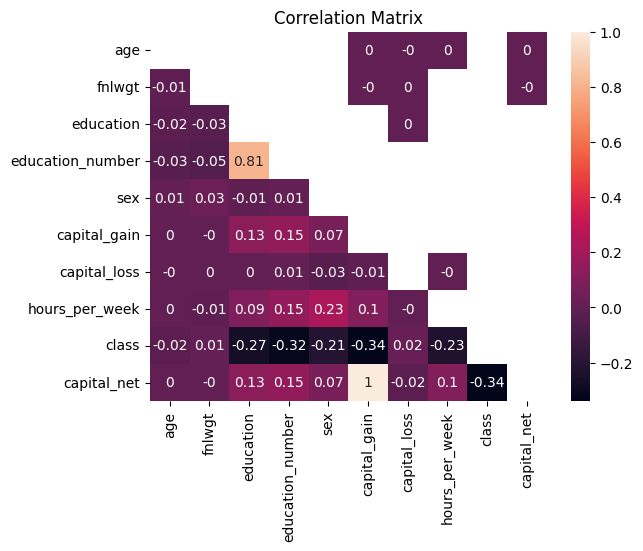

In [46]:
plt.figure(144)
sns.heatmap(round(data_corr,2),annot=True,mask=np.triu(round(data_corr,2)))
plt.title('Correlation Matrix')

In [47]:
final_columns=list(data.columns)
final_columns.remove('education')
final_columns.remove('capital_net')

### One-hot encoding

In [48]:
final_data2=data.copy()

In [49]:
final_data=pd.get_dummies(data[final_columns]\
                          ,columns=['work_class',\
                                    'marital_status','occupation','relationship','race'],drop_first=True)

## Models

### Train/Test Split

In [50]:
x=final_data.drop('class',axis=1)
y=final_data['class'].astype('int')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

### Decission Tree

In [51]:
x_temp,x_val,y_temp,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=101)

In [52]:
tree_train=DecisionTreeClassifier(random_state=42)
path=tree_train.cost_complexity_pruning_path(x_temp,y_temp)
sigmas=path.ccp_alphas

In [53]:
scores_val_sigma=[]
for s in sigmas:
    tree_train=DecisionTreeClassifier(random_state=42,ccp_alpha=s)
    tree_train.fit(x_temp,y_temp)
    tree_train.predict(x_val)
    scores_val_sigma.append(tree_train.score(x_val,y_val))

In [54]:
sigma=sigmas[np.argmax(scores_val_sigma)]

In [55]:
scores_temp=[]
scores_val=[]
N=x_train.shape[0]
leafs=[]
for n in range(2,50):
    tree=DecisionTreeClassifier(max_leaf_nodes=n,random_state=42)
    tree.fit(x_temp,y_temp)
    score_temp=tree.score(x_temp,y_temp)
    score_val=tree.score(x_val,y_val)
    scores_temp.append(score_temp)
    scores_val.append(score_val)
    leafs.append(n)

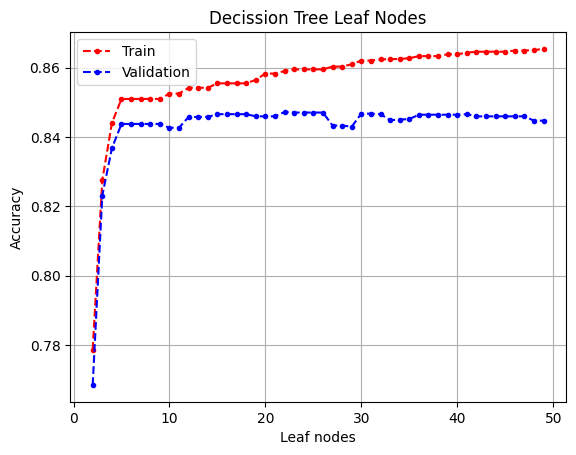

In [56]:
plt.figure()
plt.plot(range(2,50),scores_temp,marker='.',linestyle='--',color='r',label='Train')
plt.plot(range(2,50),scores_val,marker='.',linestyle='--',color='b',label='Validation')
plt.legend()
plt.xlabel('Leaf nodes')
plt.ylabel('Accuracy')
plt.title('Decission Tree Leaf Nodes')
plt.grid()
plt.show()

In [57]:
balance=(1-np.array(scores_val))+sigma*(np.array(leafs)/50)

In [58]:
min_position=np.argmin(balance)

In [59]:
tree_final=DecisionTreeClassifier(max_leaf_nodes=leafs[min_position])
tree_final.fit(x_train,y_train)
predictions=tree_final.predict(x_test)
predictions_train=tree_final.predict(x_train)

In [60]:
print('Decision Tree Training \n',classification_report(y_train,predictions_train))

Decision Tree Training 
               precision    recall  f1-score   support

           0       0.76      0.53      0.62      4781
           1       0.87      0.95      0.91     16526

    accuracy                           0.86     21307
   macro avg       0.82      0.74      0.77     21307
weighted avg       0.85      0.86      0.85     21307



In [61]:
print('Decision Tree Test \n',classification_report(y_test,predictions))

Decision Tree Test 
               precision    recall  f1-score   support

           0       0.74      0.53      0.62      1963
           1       0.88      0.95      0.91      7169

    accuracy                           0.86      9132
   macro avg       0.81      0.74      0.77      9132
weighted avg       0.85      0.86      0.85      9132



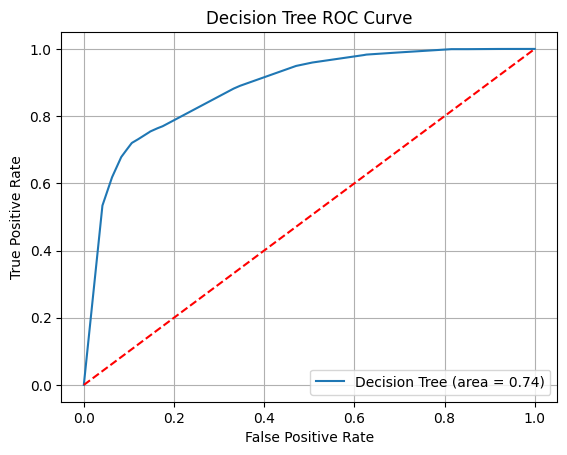

In [62]:
dtree_roc_auc = roc_auc_score(y_test, tree_final.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_final.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid()

### Random Forest

In [63]:
scores_temp=[]
scores_val=[]
N=x_train.shape[1]
max_variables=[]
for n in range(2,N):
    forest=RandomForestClassifier(n_estimators=200,max_leaf_nodes=min_position,max_features=n)
    forest.fit(x_temp,y_temp)
    score_temp=forest.score(x_temp,y_temp)
    score_val=forest.score(x_val,y_val)
    scores_temp.append(score_temp)
    scores_val.append(score_val)
    max_variables.append(n)

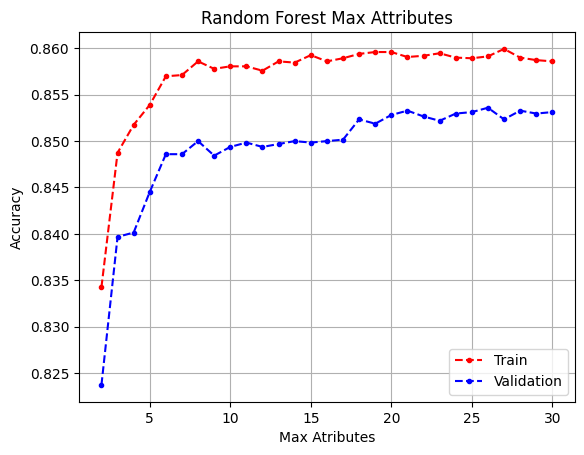

In [64]:
plt.figure()
plt.plot(range(2,N),scores_temp,marker='.',linestyle='--',color='r',label='Train')
plt.plot(range(2,N),scores_val,marker='.',linestyle='--',color='b',label='Validation')
plt.legend()
plt.xlabel('Max Atributes')
plt.ylabel('Accuracy')
plt.title('Random Forest Max Attributes')
plt.grid()
plt.show()

In [65]:
min_position=np.argmax(scores_val)

In [66]:
random_f=RandomForestClassifier(n_estimators=200,max_leaf_nodes=min_position,max_features=max_variables[min_position])

In [67]:
random_f.fit(x_train,y_train)

RandomForestClassifier(max_features=26, max_leaf_nodes=24, n_estimators=200)

In [68]:
predictions=random_f.predict(x_test)
predictions_train=random_f.predict(x_train)

In [69]:
print('Random Forest Training \n',classification_report(y_train,predictions_train))

Random Forest Training 
               precision    recall  f1-score   support

           0       0.77      0.53      0.63      4781
           1       0.87      0.95      0.91     16526

    accuracy                           0.86     21307
   macro avg       0.82      0.74      0.77     21307
weighted avg       0.85      0.86      0.85     21307



In [70]:
print('Random Forest Test \n',classification_report(y_test,predictions))

Random Forest Test 
               precision    recall  f1-score   support

           0       0.74      0.52      0.61      1963
           1       0.88      0.95      0.91      7169

    accuracy                           0.86      9132
   macro avg       0.81      0.74      0.76      9132
weighted avg       0.85      0.86      0.85      9132



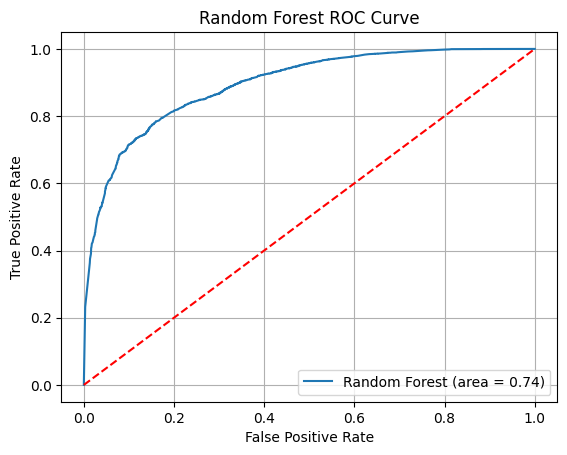

In [71]:
dtree_roc_auc = roc_auc_score(y_test, random_f.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, random_f.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid()

### Neural Networks

In [72]:
model=Sequential([Input(shape=(31,)),\
                 Dense(128,activation='relu'),\
                 Dropout(0.2),\
                 Dense(64,activation='relu'),\
                 Dropout(0.2),\
                 Dense(1,activation='sigmoid')])

In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam',\
             loss='binary_crossentropy',\
             metrics=['accuracy','precision'])

In [75]:
model.fit(x_temp,y_temp,epochs=50,validation_data=(x_val,y_val),batch_size=32)

Epoch 1/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7873 - loss: 0.4667 - precision: 0.8192 - val_accuracy: 0.8430 - val_loss: 0.3402 - val_precision: 0.8675
Epoch 2/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8447 - loss: 0.3438 - precision: 0.8775 - val_accuracy: 0.8445 - val_loss: 0.3337 - val_precision: 0.8737
Epoch 3/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8470 - loss: 0.3346 - precision: 0.8767 - val_accuracy: 0.8430 - val_loss: 0.3368 - val_precision: 0.8857
Epoch 4/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8522 - loss: 0.3254 - precision: 0.8797 - val_accuracy: 0.8451 - val_loss: 0.3283 - val_precision: 0.8718
Epoch 5/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8531 - loss: 0.3220 - precision: 0.8805 - val_accuracy: 0.8453 - val_loss: 0.3333 - val_precision: 0.8822
Epoch 6/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8541 - loss: 0.3164 - precision: 0.8825 - val_accuracy: 0.8472 - val_loss:

In [76]:
predictions=model.predict(x_test)
predictions_train=model.predict(x_train)

286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


In [77]:
print('Neural Network Training \n',classification_report(y_train,np.round(predictions_train[:,0],0).astype(int)))

Neural Network Training 
               precision    recall  f1-score   support

           0       0.76      0.57      0.65      4781
           1       0.88      0.95      0.91     16526

    accuracy                           0.86     21307
   macro avg       0.82      0.76      0.78     21307
weighted avg       0.86      0.86      0.86     21307



In [78]:
print('Neural Network Test \n',classification_report(y_test,np.round(predictions[:,0],0).astype(int)))

Neural Network Test 
               precision    recall  f1-score   support

           0       0.70      0.54      0.61      1963
           1       0.88      0.94      0.91      7169

    accuracy                           0.85      9132
   macro avg       0.79      0.74      0.76      9132
weighted avg       0.84      0.85      0.84      9132



286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step


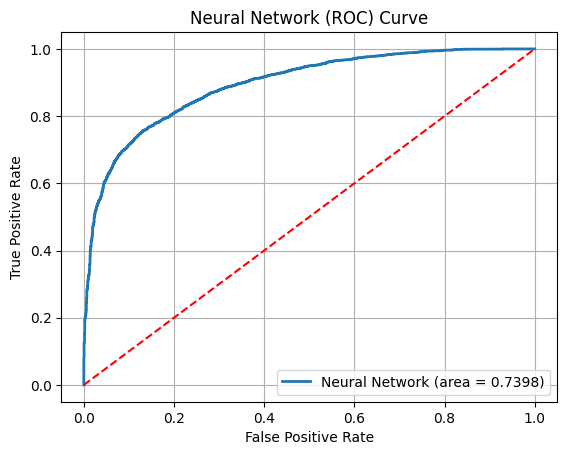

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(x_test))
nn_roc_auc = roc_auc_score(y_test, np.round(predictions[:,0],0).astype(int))

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f"Neural Network (area = {nn_roc_auc:.4f})")
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Neural Network (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()